In [1]:
import nbragg

In [73]:
data = nbragg.Data.from_transmission("Fe_13733003.exfor.txt")

<Axes: xlabel='wavelength [Å]', ylabel='Transmission'>

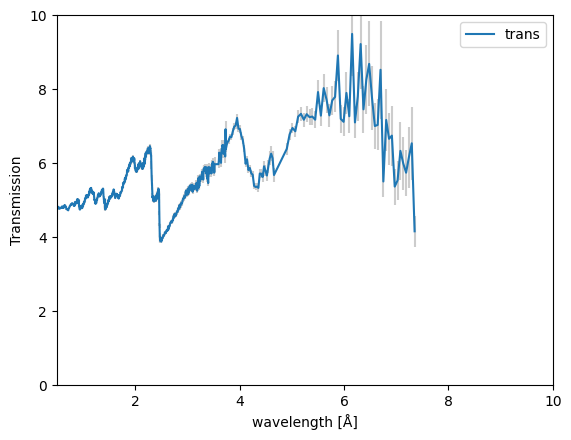

In [78]:
data.plot(ylim=(0,10))

In [79]:
gamma = nbragg.CrossSection.from_material(nbragg.materials["Fe_sg225_Iron-gamma.ncmat"])

In [84]:
model = nbragg.TransmissionModel(gamma,vary_background=True,vary_response=True)

In [85]:
model.params

name,value,initial value,min,max,vary
thickness,1.00000000,None,-inf,inf,True
norm,1.00000000,None,-inf,inf,True
α1,3.67000000,3.67,-inf,inf,True
β1,3.06000000,3.06,-inf,inf,True
b0,0.00000000,0.0,-inf,inf,True
b1,0.00000000,0.0,-inf,inf,True
b2,0.00000000,0.0,-inf,inf,True
b3,0.00000000,0.0,-inf,inf,True
b4,0.00000000,0.0,-inf,inf,True


In [86]:
result = model.fit(data,wlmin=1,wlmax=5)

ModuleNotFoundError: No module named 'bem'

In [69]:
from urllib.request import urlopen, Request
import pandas as pd
import io

x4id = 13733002
req = Request(
        url=f'https://nds.iaea.org/exfor/x4get?DatasetID={x4id}&op=csv',
        data=None,
        headers={
            'User-Agent': 'Mozilla/5.0 (X11; Fedora; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
        }
    )
with urlopen(req) as f:
    df = pd.read_csv(io.StringIO(f.read().decode('utf-8')))
if 'EN (EV) 1.1' in list(df):
    x4_E, x4_xs = df['EN (EV) 1.1'].values, df['DATA (B) 0.1'].values
elif 'EN (MEV) 1.1' in list(df):
    x4_E, x4_xs = 1e6*df['EN (MEV) 1.1'].values, df['DATA (B) 0.1'].values

df = df[['EN (EV) 1.1',"DATA (B) 0.1",'DATA-ERR (B) 0.911']]
df.columns = ["energy", "data", "data_err"]

In [70]:
df.to_csv("Be_13733002.exfor.txt",sep=" ",header=False)

<Axes: xlabel='energy'>

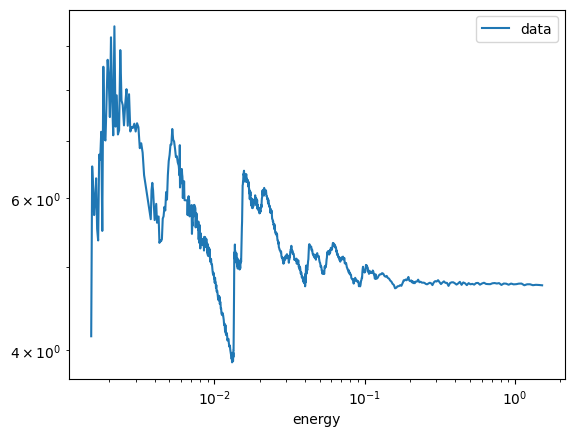

In [61]:
df.plot(x="energy",y="data",loglog=True)